# Introductions

The Deep Learning Foundation Program is divided into **six chapters**, some of which including a project to complete:


1.   Introductions
2.   Neural Networks (**P1: Your first neural network**)
3.   Convolutional Neural Networks (**P2: Dog Breed Classifier**)
4.   Recurrent Neural Networks (**P3: Generate TV Scripts**)
5.   Generative Adversarial Networks (**P4: Generate Faces**)
6.   Deep Reinforcement Learning (**P5: Teach a Quadcopter to Fly**)

**Machine Learning:**
* Supervised (Feedback)
* Unsupervised (No labels)
* Reinforcement Learning (Feedback at the end)

---


## Anaconda
Conda is a package manager that organizes dependencies in environments



```
conda create -n name packages=3       # Creates a new environment
conda env list                        # Lists all environments
source activate name                  # Activates an environment
  conda install numpy pandas ...      # Installs packages inside the environment
  conda list                          # Lists all packages installed in the environment
  conda env export > environment.yaml # Exports all depencencies into a yaml file
conda env create -f environment.yaml  # Creates a new environment from the yaml file
conda env remove -n name              # Remove conda env
```


## Jupyter
A notebook is a web appplication that allows you to combine explanatory text, math equations, code and visualizations all in one easily sharable document.
It is an example of [literate programming](http://www.literateprogramming.com/)

### How Jupyter works:

![explanation of how jupyter notebooks work](https://jupyter.readthedocs.io/en/latest/_images/notebook_components.png)

## Matrix Math and Numpy Refresher
### Data Dimensions
**Scalar:** Simplest shape | 0 dimsension
**Vectors:** Row or Column vectors | 1 dimesion = length
**Matrices:** 2d Vector | 2 dimensions
**Tensors:** n-dimensional tensor

Axy = x is the row and y is the column.

### Numpy
Written in C to perform fast mathematical operations.

In [1]:
import numpy as np

s = np.array(5)        # Scalar
s.shape                # () since it is a scalar

v = np.array([1,2,3])  # Vector
v.shape                # (3,)
v[1]                   # 2
v[1:]                  # 2,3 | Access elements from the second one on

m = np.array([[1,2,3], [4,5,6], [7,8,9]])
m.shape                # (3,3)

t = np.array([[[[1],[2]],[[3],[4]],[[5],[6]]],[[[7],[8]],[[9],[10]],[[11],[12]]],[[[13],[14]],[[15],[16]],[[17],[17]]]])
t.shape                # (3,3,2,1)

v.reshape(1,3)         # Change the shape
v = v[:, None]         # More experienced reshaping
v = v[None,:]
v

array([[[1],
        [2],
        [3]]])

### Element-wise Matrix Operations
Treat the items in the matrix individually and perform the same operation on each one.
Matrices have to have the same shape.

In [2]:
values = [1,2,3,4,5]
values = np.array(values) + 5
print(values)            # [6,7,8,9,10]

values = np.multiply(values, 5)
print(values)            # [30,35,40,50]

[ 6  7  8  9 10]
[30 35 40 45 50]


### Matrix Multiplication
Matrices don't have to have the same shape.
Rows of the first Matrix and the columns of the second matrix. (Taking the Dot Product multiple times)

#### Important Reminders about Matrix Multiplication
* Number of columns in the left matrix must be equal to the number of rows in the second matrix. (2x3 and 3x2) (RowsXColumns)
* The Result will have the same number of rows as the left matrix and the same number of columns as the right matrix.
* Order matters. A*B != B*A
* The data in the left should be ordered in rows and in columns in the left

#### Dot Product
Multiply the corresponding elements of each vector. Then we add up all the results.

### NumPy Matrix Multiplication

**Element-wise** Multiplication: Using the * or multiply function:

In [3]:
import numpy as np

multiple = np.array([[1,2,3],[4,5,6]])
multiple

new = multiple * 0.25
new

new * multiple

np.multiply(multiple, new)


array([[0.25, 1.  , 2.25],
       [4.  , 6.25, 9.  ]])

Finding the **Matrix Product** using NumPy's matmul function:

In [4]:
a = np.array([[1,2,3,4],[5,6,7,8]])
a

a.shape # (2,4)

b = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
b

b.shape # (4,3)

c = np.matmul(a,b)
c

c.shape # 2,3

(2, 3)

NumPy's **dot function** can be identical to matmul (if the matrices are 2-dimensional)

In [5]:
a = np.array([[1,2],[3,4]])

np.dot(a,a)
a.dot(a)
np.matmul(a,a)

array([[ 7, 10],
       [15, 22]])

### Transpose

If the original Matrix was **not** a square the new transpose will have the dimensions swapped.
Each feature is either in a row or a column.

The option if you should transpose depends on the situation(!)

**The only time you can safely use a tranpose if both data is arranged as rows**

In [7]:
m = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(m)

print("Transponse \n", m.T) # Transpose of m

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Transponse 
 [[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


# Neural Networks

## Lesson 1: Introduction to Neural Networks

First idea is to compare Neural Networks to Linear Regression.

W = Weights
b = Bias
x = Input
y = label
ÿ = Prediction

### Perceptron

**Comparison:** The Perceptron is the 2\*Test + 1\*Grades -18. Smaller Nodes are Inputs. Arrows are the Weights/Bias.

![Image Perceptron](https://)

#### Perceptron as Logical Operators

**AND:** Only true if both INs are 1

**OR:** If any of it's INs are 1

**NOT:** Flips one of the Inputs

**NAND:** Not and and

The Perceptron Steps (Only works for linear function):


In [8]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        pred = prediction(X[i], W, b)
        if y[i] - pred == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        if y[i] - pred == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b

### Error Functions

* Minimizing the Error functions => Avoid local minimum. (Gradient Descent)
* Error functions needs to be differentiable and continuous.

**Goal:** Finding the way to minimize the Loss the fastest. The challenge is not to get stuck in a local minimum.
Correctly classified points should carry a small Error. Not correctly classified points should carry a high penalty.

**Prediction:** Discrete would be: Yes/no. Continious would be 0-100% likelyhood of something:
* **Sigmoid:** Change the Activation function from Step function to sigmoid. 1/(1+e^-x)
* **Softmax:** Classification Problems. The probabilities across all options have to add to 1. e^Zi / e^Zn
* **One-Hot Encoding:** Inputvariables. One variable for each class. Each class has a column with either 0 or 1. So the value for each element is for example [0,0,1]

### Maximum Probability

All Probabilities of each points multiplied. Gives the Probabilities that these points are the respective colors. The goal then becomes to maximize the likelyhood.
* Increasing the probability => Deceasing the error
* Going from products to sums: log. Becasue log(ab) = log(a) + log(b). All negative numbers => -ln(x)

### Cross-Entropy

=> -ln(x).

Good model gives a small Cross Entropy, A bad model gives a high Cross Entropy.

Cross entropy says if a bunch of events and a bunch of probabilities, how likely is it that those events happen based on the probabilities?

* Very likely: Small CE
* Very unlikely: Big CE

All probabilities of all Ys adds up to 1.

**CE:** Gives how similiar two vectors are.

In [5]:
import numpy as np

L = [1,0,1,1]
P = [0.4,0.6,0.1,0.5]

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    
    result = 0
    
    for y,p in zip(Y,P):
        if y == 0:
            result += np.log(1 - p)
        else:
            result += np.log(p)
    
    return result * (-1)
  
print(cross_entropy(L,P))

4.828313737302301


### Multi-Class Cross Entropy

**CE:** -Ei Ej yij ln(pij)

A higher CE correlates to a lower Probability of this event happening (and vice versa)

### Gradient Descent (Step)

From the Error function through Gradient Descent a smaller Error function is searched for.

Negative of the Gradient of the Error function leads us to the fastest way *"down"*. (Times a small learning rate)

The **Derivative of the Sigmoid function** is: s(x) * (1-s(x))

The **Derivative of the Error function** is: -(y - ÿ)(x1,...,xn,1)

#### Step

w'i <- wi + alpha(y-ÿ)xi (where alpha is the learning rate **and** 1/m * alpha)

The update of the bias is similiar.


#### Pseudo Code

1. Start with random weights
2. For every point

  2.1 For i = i...n
  
    2.1.1 Update w'i <- wi - alpha(ÿ-y)xi
    
    2.2.2 Update b' <- b - alpha(ÿ-y)
3. Repeat until the error is small

(How many times = epochs)

In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

### Neural Network Architecture

**Non-linear Models:** The line seperating two point groups will not be linear anymore this is where Neural Networks come into play

=> Combining two linear models. Two probabilies via the sigmoid function. Adding two linear models to obtain a third model.

* Input Layer (containts the inputs x1, x2,..., xn)
* Hidden Layer
* Output Layer (non-linear space)

**Multi-class problems** have more Output Layers

**More Hidden Layers:** Deep(er) Neural Network.



### Feedforward

This is the process of neural networks use to turn the input into an output.
Through the weights the different inputs get a stronger emphasis.

Input vector -> Apply a sequence of linear functions and sigmoid functions to get a highly non-linear output layer.

### Backpropagation

E(W) = 1/m E yi ln(ÿi) + (1 - yi)ln(1 - ÿi)

* Doing a feedforward operation
* Comparing the output to the desired output (y - ÿ)
* Calculating the Error
* Running the feedforward operation backwards to spread the error to each of the weights
* Use this to update the weights and get a better model
* Repeat this process



## Lesson 2: Implementing Gradient Descent

In the last chapter we used the log-loss function. There are many other error functions used for neural networks. One is called the mean squared error: It is the mean of the squares of the differences between the predictions and the labels.

**SSE:** E = 1/2 EE (yj - ÿj)^2

**Caveats:** We can end up in a local minima. That happens if the weights are initialized with the wrong values.

The **derivative of the Error** with respect to wi is: - (y - ÿ)f'(h)xi

In [6]:
import numpy as np

# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input data
x = np.array([0.1, 0.3])
# Target
y = 0.2
# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

# the linear combination performed by the node (h in f(h) and f'(h))
h = x[0]*weights[0] + x[1]*weights[1]
# or h = np.dot(x, weights)

# The neural network output (y-hat)
nn_output = sigmoid(h)

# output error (y - y-hat)
error = y - nn_output

# output gradient (f'(h))
output_grad = sigmoid_prime(h)

# error term (lowercase delta)
error_term = error * output_grad

# Gradient descent step 
del_w = [ learnrate * error_term * x[0],
          learnrate * error_term * x[1]]
# or del_w = learnrate * error_term * x

print(del_w)

[-0.003963803079006883, -0.011891409237020648]


Here's the general algorithm for updating the weights with gradient descent:

Set the weight step to zero: Δwi=0\Delta w_i = 0Δwi​=0

**For each record in the training data:**

* Make a forward pass through the network, calculating the output y^=f(∑iwixi)\hat y = f(\sum_i w_i x_i)y^​=f(∑i​wi​xi​)
* Calculate the error term for the output unit, δ=(y−y^)∗f′(∑iwixi)\delta = (y - \hat y) * f'(\sum_i w_i x_i)δ=(y−y^​)∗f′(∑i​wi​xi​)
* Update the weight step Δwi=Δwi+δxi\Delta w_i = \Delta w_i + \delta x_iΔwi​=Δwi​+δxi​
* Update the weights wi=wi+ηΔwi/mw_i = w_i + \eta \Delta w_i / mwi​=wi​+ηΔwi​/m where η\etaη is the learning rate and mmm is the number of records. Here we're averaging the weight steps to help reduce any large variations in the training data.

Repeat for e epochs.

**Example with Epochs:**


In [0]:
import numpy as np
from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output

        # TODO: Calculate the output
        h = np.dot(x, weights)
        
        output = sigmoid(h)

        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate the error term
        #output_grad = output * (1 - output)
        
        error_term = error * output * (1 - output)

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        del_w += error_term * x

    # TODO: Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

### Multilayer Preceptrons

With hidden units, the weights between them will require two incides: wij, where i denotes input units and j are the hidden units

#### Making a column vector

It's possible to get the transpose of an array like so arr.T but for a 1D array, the transpose will return a row vector. Instead use arr[:,None] to create a column vector:

In [7]:
features = np.array([0.49671415, -0.1382643 , 0.64768854])

print(features)
# array([ 0.49671415, -0.1382643 ,  0.64768854])

print(features.T)
# array([ 0.49671415, -0.1382643 ,  0.64768854])

print(features[:, None])
# array([[ 0.49671415],
#       [-0.1382643 ],
#       [ 0.64768854]])

[ 0.49671415 -0.1382643   0.64768854]
[ 0.49671415 -0.1382643   0.64768854]
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


#### Backpropagation

Using the chain rule to find the error with respect to the weights connecting the input layer to the hidden layer (for a two layer network).

In [8]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## Calculate output error
error = target - output

# Calculate error term for output layer
output_error_term = error * output * (1 - output) # error * error_grad

# Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * hidden_layer_output * (1 - hidden_layer_output)

# Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]


#### Implementing Backpropagation

In [9]:
import numpy as np
from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        
        input_for_output = np.dot(hidden_output, weights_hidden_output)
        
        output = sigmoid(input_for_output)

        ## Backward pass ##
        # Calculate the network's prediction error
        error = y - output

        # Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors to hidden layer

        # Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, weights_hidden_output)
        
        # Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)
        
        # Update the change in weights
        del_w_hidden_output += learnrate * output_error_term * hidden_output
        del_w_input_hidden += learnrate * hidden_error_term * x[:, None]

    # Update weights
    weights_input_hidden += del_w_input_hidden
    weights_hidden_output += del_w_hidden_output

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

ModuleNotFoundError: ignored

## Lesson 3: Training Neural Networks

**Training set:** Model is trained with that without looking at the Testing set.

**Validation set:** Set of data that is re-introduced at the end of each Epoch to measure the validation loss.

**Testing set:** Testing the Model at the end (Re- Introduced)

---

**Overfitting:** Fit the data well, but it can not generalize. Error due to variance.

**Underfitting:** Trying to kill godzilla with a flyswatter. Error due to bias.

Both problems also correlate with a too simple/too complicated neural network architecture.
We err on the side of an overly complicated model and then apply techniques to prevent overfitting.

#### Early Stopping

Underfitting: Training and Test errors are big
Overfitting: Training Error is tiny and Testing Error Large

--> Model Complexity Graph
Testing Error increases with more Epochs
Training Error decreases with the Epochs
We need the point where the **Testing Error increases again** (Early Stopping)

#### Regularization

When we apply sigmoid to 10x1 and 10x2 the function becomes steeper => Gradient Descent becomes harder.

##### Punish large coefficients:
**L1**: MSE + lamda * w1,...,wn (absolute values)
* Good for features selection
* Sparse Vectors. Small number of weights.

**L2**: MSE + lamda * w1,...,wn (squared)
* Normally better for Training Models
* Does not favor small vectors

### Dropout

One part of the network has large weights and dominates the training.
**Sometimes during training some nodes are turned off.**
Probability that each node will be dropped.

### Vanishing Gradient

**Hyperbolic Tangent Function:** e^x - e^x / e^x + e^x

**Rectified Linear Unit (ReLU):** If Positive return x. If negative return 0.

### Batch vs. Stochastic Gradient Descent

Number of steps in the gradient descent = Number of epochs.
Epoch whole forward and backward pass for the data.

**Stochastic Gradient Descent:** Small subset of the data. Batches of the whole data.

### Learning Rate Decay

Best: If steep: Long steps. If plain: small steps.

**Random Restart**: Gradient Descent from different locations.

**Momentum**: Average of the last # steps. Beta between 0-1. Step(n) + b*Step(n-1) + ...

## Lesson 6: Sentiment Analysis



In [9]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)
        # np.random.seed(time.time()) # for non-development environment

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation. 
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

## Lesson 7: Keras

Examples of packages for deep learning:

* Keras
* TensorFlow
* Caffe
* Theano
* Scikit-learn
* PyTorch
* ...

### Creating a Sequential Model in Keras

In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Layers
## Fully connected layers
## max pool layers
## activation layers
## and more

# X has shape (num_rows, num_cols) where the training data is stored as row vectors
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)

# y must have an output vector for each input vector
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Create the Sequential model
model = Sequential()
# The keras.models.Sequential class is a wrapper for the neural network model
# that treats the network as a sequence of layers

# 1st layer - Add an input layer of 32 nodes with the same input shape as X
model.add(Dense(32, input_dim=X.shape[1]))

# Add a softmax activation layer
model.add(Activation('softmax'))

# 2nd layer - Add a fully connected output layer
model.add(Dense(1))

#Add a sigmoid activation layer
model.add(Activation('sigmoid'))

X

Using TensorFlow backend.


array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

* Keras requires the input shape to be specified for the first layer. It will automatically infer the shape of all other layers
* Activation is added after the layers
* Compiling the Keras model calls the backend (tensorflow, theano, etc.) and binds the optimizer, loss function and other paramters required before the model can be run on any input data.
* We specify the loss function to be *categorical_crossentropy*
* and specify *adam* as the optimizer
* also we specify what metrics we want to evaluate the model with

In [5]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

# See the resulting model architecture with the following command
model.summary()

# Train with the fit() method

model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model

model.evaluate()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


ValueError: If evaluating from data tensors, you should specify the `steps` argument.

### Keras Optimizers

**SGD - Stochastic Gradient Descent:** It uses the following paramters:
* Learning rate.
* Momentum
* Nesterov Momentum (This slows down the gradient when it's close to the solution)

**Adam:** Adaptive Moment Estimation uses a more complicated exponential decay that consists of not just considering the average (first moment), but also the variance (second moment) of the previous steps.

**RMSProp:** RMSProp (RMS stands for Roo Mean Square Error) decreases the learning rate by dividing it by an exponentially decaying average of squared gradients.

[Further explanation of Keras Optimizers](http://ruder.io/optimizing-gradient-descent/index.html#rmsprop)

[Keras Documentation about Optimizers](https://keras.io/optimizers/)

### IMDB Data in Keras

In [6]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

17465344/17464789 [==============================] - 1s 0us/step
(25000,)
(25000,)


In [7]:
print(x_train[0])
print(x_test[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 

In [8]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [15]:
print("y_train", y_train[0])
print("x_train.shape[1]", x_train.shape[1])

y_train [0. 1.]
x_train.shape[1] 1000


In [16]:
# Build the model architecture
model = Sequential()

model.add(Dense(8, input_dim=x_train.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(2))
# Compile the model using a loss function and an optimizer.
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics = ["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 8008      
_________________________________________________________________
activation_3 (Activation)    (None, 8)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 8,026
Trainable params: 8,026
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Training and evaluating
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 3s - loss: 0.7260 - acc: 0.4333 - val_loss: 0.6570 - val_acc: 0.3014
Epoch 2/10
 - 3s - loss: 0.6421 - acc: 0.3476 - val_loss: 0.6156 - val_acc: 0.3400
Epoch 3/10
 - 3s - loss: 0.8134 - acc: 0.4374 - val_loss: 0.7851 - val_acc: 0.5000
Epoch 4/10
 - 3s - loss: 0.7505 - acc: 0.5000 - val_loss: 0.7246 - val_acc: 0.5000
Epoch 5/10
 - 3s - loss: 0.7164 - acc: 0.5000 - val_loss: 0.7061 - val_acc: 0.5000
Epoch 6/10
 - 3s - loss: 0.7038 - acc: 0.5000 - val_loss: 0.6986 - val_acc: 0.5000
Epoch 7/10
 - 3s - loss: 0.6984 - acc: 0.5000 - val_loss: 0.6952 - val_acc: 0.5000
Epoch 8/10
 - 3s - loss: 0.6958 - acc: 0.4951 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 9/10
 - 3s - loss: 0.6947 - acc: 0.4950 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 10/10
 - 3s - loss: 0.6942 - acc: 0.4796 - val_loss: 0.6921 - val_acc: 0.5000


## Lesson 8: TensorFlow

Keras is good for building neural networks quickly, but it abstracts a lot of detail.
TensorFlow is great for understanding how neural networks operate on a lower level.

In [18]:
import tensorflow as tf

hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
  output = sess.run(hello_constant)
  print(output)

b'Hello World!'


In [19]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234)
# B is a 1-dimensional int32 tensor
B = tf.constant([123,456,789])
# C is a 2-dimensional int32 tensor
C = tf.constant([[123,456,789], [222,333,444]])

### Session

The Tensorflow Session is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines

#### tf.placeholder()

tf.placeholder() returns a tensor that gets its value from data passed to the tf.session.run() function, allowing you to set the input right before the session runs.

In [20]:
x = tf.placeholder(tf.string)

with tf.Session() as sess:
  output = sess.run(x, feed_dict={x: "Hello World"})
  print(output)

Hello World


In [24]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Test String', y: 123, z: 45.67})
    print(output)
    print(y)
    print(z)

Test String
Tensor("Placeholder_11:0", dtype=int32)
Tensor("Placeholder_12:0", dtype=float32)


In [25]:
# Addition
x = tf.add(5, 2)
# Subtraction
y = tf.subtract(10, 4)
# Multiplication
z = tf.multiply(2, 5)

# Casting
tf.cast(tf.constant(2.0), tf.int32)

<tf.Tensor 'Cast:0' shape=() dtype=int32>

#### Linear functions in TensorFlow

The goal of training a NN is to modify weights and biases to best predict labels. Therefore we use tf.Variable

tf.Variable is a tensor with an initial value that can be modified, much like a normal Python variable.This tensor stores its state in the session, so you must initialize the state of the tensor manually with tf.global_variables_initializer()

In [26]:
# Initialization
x = tf.Variable(5)
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)

In [27]:
# Initializing the weights with random numbers from a normal distribution is good practice
# -> tf.truncated_normal()

n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

In [28]:
# tf.zeros()

bias = tf.Variable(tf.zeros(n_labels))

In [30]:
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # Return weights
    weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))
    
    return weights


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # Return biases
    bias = tf.Variable(tf.zeros(n_labels))
    
    return bias


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # Linear Function (xW + b)
    return tf.add(tf.matmul(input,w),b)

################################################################################

from tensorflow.examples.tutorials.mnist import input_data

def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

# Variable initializer
init = tf.global_variables_initializer()

with tf.Session() as session:
    # Initialize session variables
    session.run(init)
    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))


ImportError: cannot import name 'models'

### TensorFlow Softmax

The softmax function squashes it's inputs, typically called logits or logit scores, to be between 0 and 1 and also normalizes the outputs such that they all sum to 1.

In [34]:
import tensorflow as tf


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)
    
    # Calculate the softmax of the logits
    softmax = tf.nn.softmax(logits)
    
    with tf.Session() as sess:
        # Feed in the logit data
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output
  
run()

array([0.6590012, 0.242433 , 0.0985659], dtype=float32)

### Cross Entropy in TensorFlow

tf.reduce_sum() function takes an array of numbers and sums them together
tf.log() is the natural log

In [35]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

# Print cross entropy from session
cross_entropy = - tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))
with tf.Session() as session:
    result = session.run(cross_entropy, feed_dict={softmax: softmax_data, one_hot: one_hot_data})
    
    print(result)

0.35667497


### Mini-batching

Mini-batching is a technique for training on subsets of the dataset instead of all the data at one time.

Mini-batching is computationally inefficient, since you can't calculate the loss simultaneously across all samples.

Combined with SGD => Randomly shuffle the data at the start of each epoch, then create the mini-batches. For each mini-batch, you train the network weights with gradient descent.

In [36]:
import math

def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # Implement batching
    output_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)
        
    return output_batches

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

epochs = 100

# Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch_i in range(epochs):
      # Train optimizer on all batches
      for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
          sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

      # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.


PermissionDeniedError: /datasets; Permission denied

### Epochs

An epoch is a single forward and backward pass of the whole dataset.

**Added epochs in code above**

In [1]:
# Normalize

# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    
    minimum = image_data.min()
    maximum = image_data.max()
    
    result = np.array([])
        
    for i in range(len(image_data)):
        result = np.append(result, (a - (((image_data[i] - minimum) * (a - b)) / (maximum - minimum))))
        
    return result

### DON'T MODIFY ANYTHING BELOW ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])

print('Tests Passed!')

NameError: name 'np' is not defined

### Deeper Neural Networks with Tensorflow

Non-linear function in the hidden layer to solve non-linear problems.

ReLU: tf.nn.relu()

In [39]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[1.0, 2.0, 3.0, 4.0], [-1.0, -2.0, -3.0, -4.0], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model
init = tf.global_variables_initializer()

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)

output = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(output))

[[ 5.11      8.440001]
 [ 0.        0.      ]
 [24.01     38.24    ]]


### Deep Neural Network in TensorFlow

In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
import tensorflow as tf

learning_rate = 0.001
training_epochs = 20
batch_size = 128
display_step = 1

n_input = 784
n_classes = 10

n_hidden_layer = 256

weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [4]:
# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

In [5]:
# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

In [6]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.global_variables_initializer()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

NameError: name 'mnist' is not defined

### Save and Restore TensorFlow Models

In [47]:
import tensorflow as tf

# The file path to save the data
save_file = './model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Initialize all the Variables
    sess.run(tf.global_variables_initializer())

    # Show the values of weights and bias
    print('Weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

    # Save the model
    saver.save(sess, save_file)

Weights:
[[-0.34276637 -0.30808565 -0.36583477]
 [-0.5262568   0.49208307 -0.09389461]]
Bias:
[-0.02612842 -0.87650937  0.5290341 ]


In [48]:
# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)

    # Show the values of weights and bias
    print('Weight:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))


INFO:tensorflow:Restoring parameters from ./model.ckpt


InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

tensor_name = Variable; expected dtype float does not equal original dtype int32
	 [[{{node save/RestoreV2}} = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/home/ubuntu/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/ubuntu/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/ubuntu/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/ubuntu/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-2a9b38b3cc9b>", line 9, in <module>
    saver = tf.train.Saver()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1094, in __init__
    self.build()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1106, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1143, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 787, in _build_internal
    restore_sequentially, reshape)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 406, in _AddRestoreOps
    restore_sequentially)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 854, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1466, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

tensor_name = Variable; expected dtype float does not equal original dtype int32
	 [[{{node save/RestoreV2}} = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


### TensorFlow Dropout

In [9]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[0.0, 2.0, 3.0, 4.0], [0.1, 0.2, 0.3, 0.4], [11.0, 12.0, 13.0, 14.0]])

# Create Model with Dropout
keep_prob = tf.placeholder(tf.float32)

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

output_layer = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  output = sess.run(output_layer, feed_dict={keep_prob: 0.5})
  print(output)


[[ 7.68       15.059999  ]
 [ 0.19600001  0.098     ]
 [43.3        48.16      ]]


# Convolutional Neural Networks

## Lesson 2: Convolutional Neural Networks

RNN are used more than CNNs

**categorical_crossentropy as loss function:** The loss will be
* Lower: When label and prediction agree
* Higher: When label and prediction disagree

**MLP:**
* Only use fully connected layers
* Only accept vectors

**CNNs:**
* Sparsely connected layers
* Accept matrices as input

Multiply each node with the weights, add i all up and add the bias (and activation function) => **Filter.**

For color images the FIlter is 3D. (RGB)

**Stride:** How are to move around the image.

**Padding:** What to do at the edges of the image? Padding the Image with zeros.

*   Valid: Loose information on the edges
*   Same: Padding is applied





In [52]:
from keras.layers import Conv2D

# Create a convolutional layer:
filters = 1
kernel_size = 2

# Conv2D(filters, kernel_size, strides, padding='same', activiation='relu', input_shape)

## mandatory fields
# filters: number of filters
# kernel_size: Number specifying both the height and the width of the (square) convolution window
# input_shape: If the first layer, it must specify the height, width and depth of the input

## optional fields
# strides: strides of the convolution
# padding: valid or same
# activation: typically relu

Conv2D(filters=16, kernel_size=2, strides=2, activation='relu', input_shape=(200, 200, 1))

In [53]:
# Dimensionality

from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, strides=2, padding='valid', activation='relu', input_shape=(200, 200, 1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 16)      80        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### Number of Parameters in a CNN

* **K** - # of filters
* **F** - height and width of the CNN filters
* **D_in** - the depth of the previous layer

K*F*F*D_in + K

### Shape of a Convolutional Layer

* **S** - stride of the convolution
* **H_in** - the height of the previous layer
* **W_in** - the width of the previous layer

If padding is **same**:

* height: ceil(float(H_in) / float(S))
* width: ceil(float(W_in) / float(S))

if padding is **valid**:

* height: ceil(float(H_in - F + 1 / float(S)))
* widt: ceil(float(W_in - F + 1 / float(S)))

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', 
    activation='relu', input_shape=(128, 128, 3)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## Pooling Layers

Type of layer for CNNs

Dimensionality of the convolutional layer can lead to overfitting => reduce dimensionality. Reduce width and height.

* max pooling layer: Take a stack of features maps as input. Run a convolution across the convolutional layer. 
* gloval average pooling layer: computes the average value of eath feature map in a convolution => More drastic reduction

In [55]:
from keras.layers import MaxPooling2D

# MaxPooling2D(pool_size, strides,padding)

## Mandatory arguments
# pool_size - Number specifiying the height and width of the pooling window
## Optional arguments
# strides - vertical and horizontal stride
# padding


In [56]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

model = Sequential()
model.add(MaxPooling2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

### Data Augmentation in Keras

We want to learn an invariant image:
* Scale Invariance
* Rotation Invariance
* Translation Invariance

Add images to the training set by doing some rotation, translation on the training set.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

In [0]:
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

- steps_per_epoch = x_train.shape[0] / batch_size

- where x_train.shape[0] corresponds to the number of unique samples in the training dataset x_train.

- By setting steps_per_epoch to this value, we ensure that the model sees x_train.shape[0] augmented images in each epoch.

**AlexNet:** Pioneered the use of the ReLU activation function as well as dropout

**VGG:** VGG16 and VGG 19 with the total layers as the numbers

**ResNet:** Like VGG. 3 convolutional layer.

Too many layers => Vanishing gradient problem.

### Visualizing CNNs

Deep Dreams: Using a input picture with a filter that recognizes something else.

### Transfer Learning

Using a CNN from a training set with new images.

The filters later in the architecture are more specific to the training network. It depends on both on size of the new data and the similiarity of the new data set to the original data set.

**The four main cases:**
1. new data set is small, new data is similiar to original training data
2. new data set is small, new data is different from original training data
3. new data set is large, new data is simimiliar to original training data
4. new data set is large, new data is different from original training data

#### Demonstration Network

What the CNN does:

1. first layer detects edges of the image
2. the second layer will detect shapes
3. the third convolutional layer detects higher level features

##### Case 1: Small Data set, Similiar Data

* slice off the end of the neural network
* add a new fully connected layer that matches the number of classes in the new data set
* randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
* train the network to update the weights of the new fully connected layer

##### Case 2: Small Data set, Different Data

* slice off most of the pre-trained layers near the beginning of the network
* add to the reminaing pre-trained layers a new fully connected layer that matches the number of classes in the new dataset
* randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
* train the network to update the weights of the new fully connected layer

##### Case 3: Large Data set, Similiar Data

* remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
* randomly initialize the weights in the new fully connected layer
* initialize the rest of the weights using the pre-trained weights
* re-train the entire neural network

##### Case 4: Large Data set, Different Data

* remove the last fully connected layer and replace with a layer matching the number of classes int he new data set
* retrain the network from scratch with randomly initialized weights
* alternatively, you could use the same strategy as the "large and similiar" data case


### Transfer Learning in Keras

Using VGG-16 for the dog breeder classification.

## Lesson 3: CNNs in Tensorflow

In [10]:
import tensorflow as tf

# TensorFlow provides:
## tf.nn.conv2d(), tf.nn.bias_add() and tf.nn.relu() to create convolutional layers

# output depth
k_output = 64

# image dimensions
image_width = 10
image_height = 10
color_channels = 3

# convolution filter dimensions
filter_size_width = 5
filter_size_height = 5

# input/image
input = tf.placeholder(
  tf.float32,
  shape=[None, image_height, image_width, color_channels])

# weight and bias
weight = tf.Variable(tf.truncated_normal(
  [filter_size_height, filter_size_width, color_channels, k_output]))
bias = tf.Variable(tf.zeros(k_output))

# apply convolution
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
## TensorFlow uses a stride vor each input dimension [batch, input_height, input_width, input_channels]

# add bias
conv_layer = tf.nn.bias_add(conv_layer, bias)
# apply activation function
conv_layer = tf.nn.relu(conv_layer)

In [12]:
"""
Setup the strides, padding and filter weight/bias such that
the output shape is (1, 2, 2, 3).
"""
import tensorflow as tf
import numpy as np

# `tf.nn.conv2d` requires the input be 4D (batch_size, height, width, depth)
# (1, 4, 4, 1)
x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)


def conv2d(input):
    # Filter (weights and bias)
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    # The shape of the filter bias is (output_depth,)
    # Define the filter weights `F_W` and filter bias `F_b`.
    # NOTE: Remember to wrap them in `tf.Variable`, they are trainable parameters after all.
    F_W = tf.Variable(tf.truncated_normal(
        [1, 1, 1, 3]))
    F_b = tf.Variable(tf.zeros(3))
    # Set the stride for each dimension (batch_size, height, width, depth)
    strides = [1, 2, 2, 1]
    # set the padding, either 'VALID' or 'SAME'.
    padding = 'SAME'
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d
    # `tf.nn.conv2d` does not include the bias computation so we have to add it ourselves after.
    return tf.nn.conv2d(input, F_W, strides, padding) + F_b

out = conv2d(X)

#### Calculation of new height/width

**SAME** Padding, the output height and width are computed as:

* out_height = ceil(float(in_height) / float(strides[1]))
* out_width = ceil(float(in_width) / float(strides[2]))

**VALID** Padding, the output height and width are computed as:

* out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
* out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))

#### Max Pooling Layers in TensorFlow

In [0]:
conv_layer = tf.cnn.conv2d(input, weight, strides=[1,2,2,1], padding='SAME')
conv_layer = tf.bias_add(conv_layer, bias)
conv_layer = tf.nn.relu(conv_layer)

# apply max pooling
conv_layer = tf.nn.max_pool(
  conv_layer,
  ksize=[1,2,2,1],
  strides=[1,2,2,1],
  padding='SAME')

### CNNs in TensorFlow

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# parameters
learning_rate = 0.00001
epochs = 10
batch_size = 10

# number of samples to calculate validation and accuracy
# Decrease this if you are running out of memory

test_valid_size = 256

# network paramters
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # dropout (probability to keep units)

weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')
  
def conv_net(x, weights, biases, dropout):
    # Layer 1 - 28*28*1 to 14*14*32
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer - 7*7*64 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf. global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: dropout})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})
            
            if (batch % 1000 == 0):
              print('Epoch {:>2}, Batch {:>3} - '
                    'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                  epoch + 1,
                  batch + 1,
                  loss,
                  valid_acc))

    # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
        x: mnist.test.images[:test_valid_size],
        y: mnist.test.labels[:test_valid_size],
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch  1, Batch   1 -Loss: 44818.6719 Validation Accuracy: 0.113281
Epoch  1, Batch 1001 -Loss:   438.1230 Validation Accuracy: 0.746094
Epoch  1, Batch 2001 -Loss:   643.5626 Validation Accuracy: 0.765625
Epoch  1, Batch 3001 -Loss:   313.2969 Validation Accuracy: 0.804688
Epoch  1, Batch 4001 -Loss:   329.3081 Validation Accuracy: 0.804688
Epoch  1, Batch 5001 -Loss:   420.2905 Validation Accuracy: 0.812500
Epoch  2, Batch   1 -Loss:    98.1446 Validation Accuracy: 0.796875
Epoch  2, Batch 1001 -Loss:   189.5718 Validation Accuracy: 0.804688
Epoch  2, Batch 2001 -Loss:    33.4470 Validation Accuracy: 0.789062
Epoch  2, Batch 3001 -Loss:    53.0415 Validation Accuracy: 0.804688
Epoch  2, Batch 4001 -Loss:     0.0000 Validation Accuracy: 0.796875
Epoch  2, Batch 5001 -Loss:    73.1148 Validation Ac

## Lesson 4: Weight Initialization



### Uniform Distribution

Equal probability of picking any number from a set of numbers. We'll be picking from a continous distribution, so the chance of picking the same number is low. We'll use TensorFlow's tf.random_uniform function to pick random numbers from a uniform distribution.

> **tf.random_uniform**(shape, minival=0, maxval=None, dtype=tf.float32, seed=None, name=None)

**General Rule for weight setting**:

> The general rule for setting the weights in a neural network is to be close to zero without being too small. A good practice is to start your weights in the range of $[-y, y]$ where
$y=1/\sqrt{n}$ ($n$ is the number of inputs to a given neuron).

### Normal Distribution

Unlike the uniform distribution, the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) has a higher likelihood of picking number close to it's mean. To visualize it, let's plot values from TensorFlow's `tf.random_normal` function to a histogram.

> >[tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/random_normal)

### Truncated Normal Distribution

The normal distribution gave a slight increasse in accuracy and loss.  Let's move closer to 0 and drop picked numbers that are `x` number of standard deviations away.  This distribution is called [Truncated Normal Distribution](https://en.wikipedia.org/wiki/Truncated_normal_distribution%29).

>[tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/truncated_normal)

## Lesson 5: Autoencoders

Autoencoders are used to compress data, as well as image denoising.

Autoencoders are bad at compressing data or generalizing to other datasets.
But, they are good at image denoising and dimensionality reduction.

In [15]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [16]:
print(mnist.train.images.shape)

(60000, 784)


In [17]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size])
targets_ = tf.placeholder(tf.float32, [None, image_size])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits) 

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [18]:
# Create the session
sess = tf.Session()

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)
        
        if(ii %200 == 0):
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.1975
Epoch: 2/20... Training loss: 0.1733
Epoch: 2/20... Training loss: 0.1529
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1068
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.1003
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0939
Epoch: 14/20... Training loss:

RuntimeError: Attempted to use a closed Session.

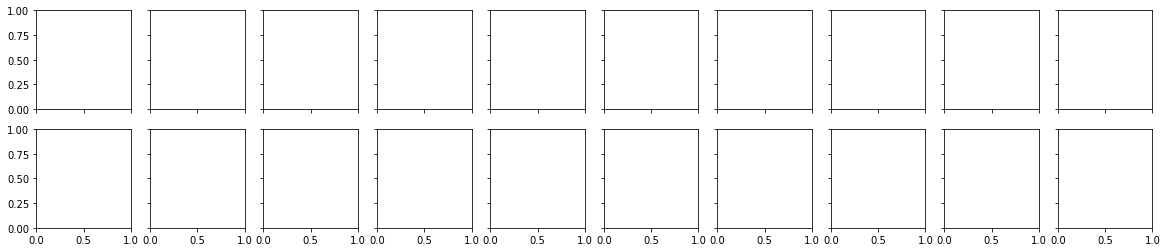

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [21]:
sess.close()

### Convolutional Autoencoders

With De-Nosing of images

> tf.image.resize_nearest_neighbor() [see Paper](https://distill.pub/2016/deconv-checkerboard/)

In [23]:
learning_rate = 0.001
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x16
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x16
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x32
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits, name='decoded')

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [24]:
sess = tf.Session()

In [25]:
epochs = 100
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})
        if(ii % 200 == 0):
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/100... Training loss: 0.6920
Epoch: 1/100... Training loss: 0.1740
Epoch: 2/100... Training loss: 0.1640
Epoch: 2/100... Training loss: 0.1399
Epoch: 3/100... Training loss: 0.1412
Epoch: 3/100... Training loss: 0.1301
Epoch: 4/100... Training loss: 0.1259
Epoch: 4/100... Training loss: 0.1313
Epoch: 5/100... Training loss: 0.1246
Epoch: 5/100... Training loss: 0.1231
Epoch: 6/100... Training loss: 0.1189
Epoch: 6/100... Training loss: 0.1184
Epoch: 7/100... Training loss: 0.1212
Epoch: 7/100... Training loss: 0.1180
Epoch: 8/100... Training loss: 0.1193
Epoch: 8/100... Training loss: 0.1149
Epoch: 9/100... Training loss: 0.1154
Epoch: 9/100... Training loss: 0.1152
Epoch: 10/100... Training loss: 0.1118
Epoch: 10/100... Training loss: 0.1122
Epoch: 11/100... Training loss: 0.1108
Epoch: 11/100... Training loss: 0.1098
Epoch: 12/100... Training loss: 0.1091
Epoch: 12/100... Training loss: 0.1123
Epoch: 13/100... Training loss: 0.1158
Epoch: 13/100... Training loss: 0.1129
Epoc

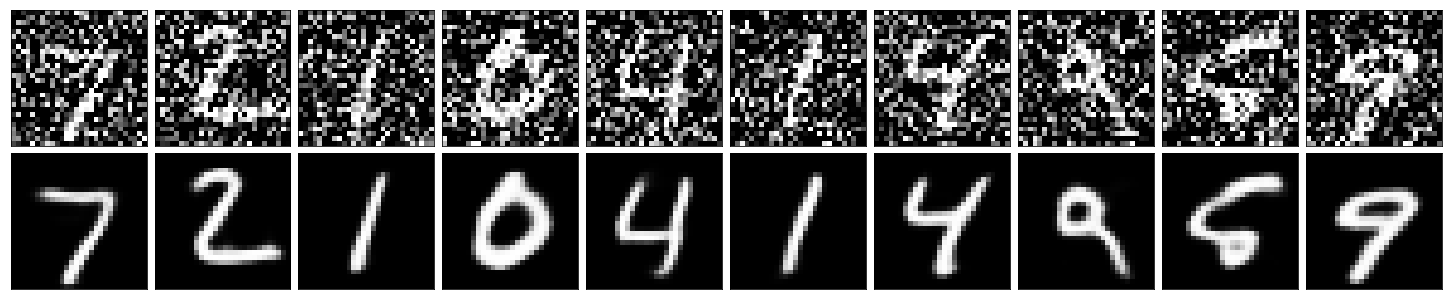

In [26]:
### Checking out the performance

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

## Lesson 6: Transfer Learning in TensorFlow

In practice, you won't typically be training your own huge networks. There are multiple models out there that have been trained for weeks on huge datasets, like [ImageNet](http://www.image-net.org/)

[The whole lesson is perfectly reflected in the Transfer_Learning Jupyter Notebook.](https://github.com/matthiasludwig/deep-learning-udacity-material/tree/master/transfer-learning)

## Lesson 8: Deep Learning for Cancer Detection with Sebastian Thrun

**Sensitivity:** Of all sick people, how many did we diagnose as sick? TP / TP + FN

**Specificity:** How many of the healthy people, did we classify as healthy? TN / TN + FP

**vs.**

**Recall:** Of all the people who have cancer, how many did we diagnose as having cancer? same as Sensitivity

**Precision:** Of all the people we diagnosed with cancer, how many actually had cancer? TP / TP + FP



### Receiver Operating Characteristic

True Positive Rate = TP / All Positives

False Positive Rate = FP / All Negatives

The Area under the Perfect ROC Curve is 1. The closer it is to a diagonal (Area around 0.5).

Therefore, we can also refer to the ROC curve as the Sensitivity-Specificity Curve.

CNNs are more consistent on the confusion matrix.

# Recurrent Networks

## Lesson 1: Recurrent Neural Networks

The neural network architectures so far have been trained using current inputs only. RNNs adress this very basic and important issue by using memory (i.e. past inputs to the network) when producing the current output. => **Temporal Dependencies**

Simple RNN: Elman Network

**Two Main types of Applications:**
1. Classification
2. Regression (for example: Time Series Forecasting)

**Static Mapping with FFNN:** output only dependent on x and W

- Training: Yield a network that generalizes beyond the train set
- Evaluation: Test with new data

**Activation Function:** Allows the network to represent nonlinear relationshipts between its inputs and outputs. (Most real-life data is non-linear)

**Overfitting Problem:**
1. Stop the Training process early
2. Regularization (Dropout)

**Updating the weight once every N steps** = Mini-Batch steps
- Reduction of the complexity of the training process
- Noise reduction

### Recurrent Neural Network

**Recurrent** - Ocurring often or repeatedly

**Memory Elements** = States

Predicting the next word in the sentence is an example for an RNN where it is important to know the last state.

**FFNN vs. RNN**

The output of the Hidden layer is part of the Input for the next Input.

xW = y (FNN - Time does not matter)

x,xt-1,xt-n * W = y

**Folded model:** In every single time step the system will look the same

Activation Function: xt x Wx + st-1 x Ws

Output = softmax(st x Wy)

st = activation(xt x Wt + st-1 x Ws)

### Backpropagation Through TIme

- st = activation(xt wx + st-1 Ws)
- yt = activation(st * Wy)
- Et = (dt - yt)^2

**Gradient calculations needed to adjust Wy**

partialEn/partialWn = partialEn / partial yn * partial yn / partial Wy

**Gradient calculations needed to adjust Ws**

In BPTT we will take into account every gradient semming frome each state, accumulating all of these contributions.

### From RNN to LSTM

--> To adress the vanishing Gradient Problem

Exploding Gradient Problem = Gradient grows uncontrollably.
- Penalizing large gradients. (Threshold)

LSTM Cell:
- Input can be stored without being forgotten.
- Avoid the loss of information due to the Vanishing Gradient Problem

Four seperate calculations:
- Fully differentiable
- Sigmoid (3x)
- Hyperbolic tangent
- Multiplication
- Addition


## Lesson 2: Long Short-Term Memory Networks

Long Term Memory:
- Show about Nature and Science
- Lots of forest Animals

Short Term Memory:
- Squirrels
- Trees

Event:
- Dog/Wolf

Output:
- Wolf (0.8)

Than update the Long Term Memory and update the Short Term Memory.

**Forget Gate**
LT forgets everything it does not consider useful

**Learn Gate**
ST + Event

**Remember Gate**
LT + ST + Event => New Long Term Memory

**Use Gate**

LT + ST + Event => New Short Term Memory AND Output

### Learn Gate

*Combine and Ignore*

Nt = tanh(Wn[ST Mt-1, Et] + bn) x it

it is the Ignore Factor.

it = sigmoid(Wi[ST Mt=1, Et] + bj)

### Forget Gate

*Keep and Forget*

LT Mt-1 * ft

ft = sigmoid(Wf [ST Mt-1, Et] + bf)

### Remember Gate

Add Forget Gate and Learn Gate

LT M t-1 ft + Ntit

### Use Gate

Ut = tanh(Wu LT Mt-1 * ft + bu)

Vt = sigmoid(Wv [ST Mt-1, Et] + bv)

Ut x Vt

### Other architectures

- Gated Recurrent Unit (GRU)
- Peephole Connections (LT Mt-1 into the forget factor)

## Lesson 3: Implementation of RNN and LSTM

**Character-wise RNN:** A Network will learn about text one character at a time and then generate new text.

**Getting the batches right:**
- RNNs: Sequences of data. Splitting Sequences in shorter sequences.
- Batch size: Number of sequences
- Sequence lenght: How much of each sequence is inputted.


## Lesson 4: Hyperparameters

Variables that we have to set. There is no general rule for the

Hyperparamters can fall into two categories:
- Optimizer Hyperparameters (learning_rate, minibatch_size, epochs)
- Model Hyperparameters (number of layers, model-specific parameters)

### The Learning Rate

The single most important parameter

0.01 (if the input data has been normalized)

- Learning Rate Decay (linear, exponentially)
- Adaptive Learning Rate

### Minibatch Size

It has an impact on the ressource requirement and the speed.

- Online (stochastic training). One forward pass, then Backprob. (Minibatch Size = 1)
- Batch. More data forwards pass, then Backprob. (Minibatch Size = 32 - 256)

### Number of Iterations

Early Stopping in TF:

[SessionRunHooks](https://www.tensorflow.org/api_docs/python/tf/train/SessionRunHook) are an evolving part of tf.train

- StopAtStepHook: A minotor to request the training stop after a certain number of steps
- NanTensorHook: a minotor that monitor's loss and stops training if it encounters a NaN loss

### Number of Hidden Units / Layers

Capacity: Learn a complex function



```
"in practice it is often the case that 3-layer neural networks will outperform 2-layer nets, but going even deeper (4,5,6-layer) rarely helps much more. This is in stark contrast to Convolutional Networks, where depth has been found to be an extremely important component for a good recognition system (e.g. on order of 10 learnable layers)." ~ Andrej Karpathy
```

Dropout and L2 to keep the network from overfitting.


### RNN Hyperparameters

Which kind of Cell?

- LSTM
- RNN vanilla
- GRU

LSTM, GRU >> RNN vanilla

Depth of at least 2.

[Example RNN Architectures](https://classroom.udacity.com/nanodegrees/nd101/parts/6df11d93-4b44-4f35-b410-a63b2e852bb9/modules/96aa308a-b292-4506-b9f1-3e80821676ce/lessons/d0cb1fca-e2e2-45a0-849d-9acb659fe97e/concepts/a8510236-a0fe-41f3-9d19-254394349820)

#### Further Ressources on Hyperparameters Tuning

[Udacity Classroom](https://classroom.udacity.com/nanodegrees/nd101/parts/6df11d93-4b44-4f35-b410-a63b2e852bb9/modules/96aa308a-b292-4506-b9f1-3e80821676ce/lessons/d0cb1fca-e2e2-45a0-849d-9acb659fe97e/concepts/6d3834cc-b5be-442b-9581-1c5fcf1615a8)

## Lesson 5: Embeddings and Word2vec

**Embeddings:** Representing data with a huge number of classes more efficiently. They greatly improve the ability of networks to learn from data of this sort by representing data with lower dimensional vectors.

Relationships between word (man <-> woman, etc.). These word embeddings are learned using a model called [Word2vec](https://en.wikipedia.org/wiki/Word2vec)

**Ressources for Word2vec implementation**

* A really good [conceptual overview](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/) of word2vec from Chris McCormick 
* [First word2vec paper](https://arxiv.org/pdf/1301.3781.pdf) from Mikolov et al.
* [NIPS paper](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) with improvements for word2vec also from Mikolov et al.
* An [implementation of word2vec](http://www.thushv.com/natural_language_processing/word2vec-part-1-nlp-with-deep-learning-with-tensorflow-skip-gram/) from Thushan Ganegedara
* TensorFlow [word2vec tutorial](https://www.tensorflow.org/tutorials/word2vec)


### Subsampling

Words that show up often such as "the", "of", and "for" don't provide much context to the nearby words. If we discard some of them, we can remove some of the noise from our data and in return get faster training and better representations. This process is called subsampling by Mikolov. For each word $w_i$ in the training set, we'll discard it with probability given by 

$$ P(w_i) = 1 - \sqrt{\frac{t}{f(w_i)}} $$

where $t$ is a threshold parameter and $f(w_i)$ is the frequency of word $w_i$ in the total dataset.

# Generative Adversarial Networks

## Lesson 1: generative Adversarial Networks

**Uses for GANs:**

- Imagine new photos
- iGAN uses GANs to help artists (Adobe & Berkeley)
- GANs can be used to translate one image to another (blueprint -> building)
- CycleGAN: Changes video of horse to a zebra.
- Can create Simulated Training Sets. (Apple)
- Imitation Learning

GANs are not limited to visual examples.
- Can learn from labeled and un-labeled data (semi-supervised learning)

### How GANs work


Generator Network:
- Random noises input -> Differentiable funciton -> transform the noise to construct an image
- Training: No output to be associated.

Discriminator:
- NN Classifier. Decides if the Image is real. Probability of 1 for real images.

The Generator is trying to "fool" the Discriminator.


### Games and Equilibria

Game Theory -> Equilibrium.

Each player (D and G) has different costs.
- G wants to minimize the value function
- D wants to maximize the value funciton

Generator Density = Data Density (Equilibrium)


### Practical tips and tricks for training GANs

- leaky Relu for hidden layers
- tanh for output layer of generator. data scaled between -1 and 1
- simgoid for discriminator output layer => probability

**Generator**:  z -> matmul+lrelu -> matmul +tanh

**Discriminator**: matmul + lrelu -> matmul + simgoid


**Loss and Optimization:**

Two losses and Optimizers.

- g_loss
- d_loss
AdamOptimizer(g_loss)
AdamOptimizer(d_loss)

D -> 1 = Real ; 0 = Fake

loss = sigmoid_cross_entropy(D_out, labels)

loss = cross_entropy(logits, labels * 0.9)

## Lesson 2: Deep Convolutional GANs

**DCGAN**: Deep Convolutional GAN Model

**Transposed Convolutional**: From narrow and deep to wide and flat (vs. k_nearest neigbor)

**Batch Normalization**: Mean = 0, Variance = 1

### Batch Normalization

Batch normalization optimizes network training. It has been shown to have several benefits:
1. **Networks train faster** – Each training _iteration_ will actually be slower because of the extra calculations during the forward pass and the additional hyperparameters to train during back propagation. However, it should converge much more quickly, so training should be faster overall. 
2. **Allows higher learning rates** – Gradient descent usually requires small learning rates for the network to converge. And as networks get deeper, their gradients get smaller during back propagation so they require even more iterations. Using batch normalization allows us to use much higher learning rates, which further increases the speed at which networks train. 
3. **Makes weights easier to initialize** – Weight initialization can be difficult, and it's even more difficult when creating deeper networks. Batch normalization seems to allow us to be much less careful about choosing our initial starting weights.  
4. **Makes more activation functions viable** – Some activation functions do not work well in some situations. Sigmoids lose their gradient pretty quickly, which means they can't be used in deep networks. And ReLUs often die out during training, where they stop learning completely, so we need to be careful about the range of values fed into them. Because batch normalization regulates the values going into each activation function, non-linearlities that don't seem to work well in deep networks actually become viable again.  
5. **Simplifies the creation of deeper networks** – Because of the first 4 items listed above, it is easier to build and faster to train deeper neural networks when using batch normalization. And it's been shown that deeper networks generally produce better results, so that's great.
6. **Provides a bit of regularlization** – Batch normalization adds a little noise to your network. In some cases, such as in Inception modules, batch normalization has been shown to work as well as dropout. But in general, consider batch normalization as a bit of extra regularization, possibly allowing you to reduce some of the dropout you might add to a network. 
7. **May give better results overall** – Some tests seem to show batch normalization actually improves the training results. However, it's really an optimization to help train faster, so you shouldn't think of it as a way to make your network better. But since it lets you train networks faster, that means you can iterate over more designs more quickly. It also lets you build deeper networks, which are usually better. So when you factor in everything, you're probably going to end up with better results if you build your networks with batch normalization.